## Importation des librairies

In [1]:
import pandas as pd  # Importation de la bibliothèque pandas pour la manipulation des données
import numpy as np   # Importation de la bibliothèque numpy pour les calculs numériques
import matplotlib.pyplot as plt   # Importation de la bibliothèque matplotlib pour la visualisation des données
import seaborn as sns   # Importation de la bibliothèque seaborn pour des visualisations plus avancées
import warnings   # Importation du module warnings pour gérer les avertissements

# Ignorer les avertissements
warnings.filterwarnings('ignore')

## Importation de la dataset

In [2]:
# Charger le fichier CSV dans un DataFrame
dataset = pd.read_csv('Churn_Modelling.csv')

# Afficher la forme du DataFrame (nombre de lignes, nombre de colonnes)
print(dataset.shape)

(10000, 14)


## Informations sur la dataset manipulée

In [3]:
# Afficher les cinq premières lignes du DataFrame
print(dataset.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [4]:
# Afficher les statistiques descriptives pour les colonnes de type 'object'
dataset.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [5]:
# Supprimer la colonne 'RowNumber' du DataFrame
dataset = dataset.drop(['RowNumber'], axis=1)

In [6]:
# Supprimer les colonnes 'CustomerId' et 'Surname' du DataFrame
dataset = dataset.drop(['CustomerId', 'Surname'], axis=1)

In [7]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Compter le nombre d'occurrences de chaque valeur unique dans la colonne 'Geography'
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
# Compter le nombre d'occurrences de chaque valeur unique dans la colonne 'Gender'
dataset.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
# Compter le nombre d'occurrences de chaque valeur unique dans la colonne 'Exited'
dataset.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
# Vérifier les valeurs nulles dans chaque colonne du DataFrame
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Afficher les statistiques descriptives pour les colonnes de type 'object'
dataset.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [14]:
# Afficher les informations détaillées sur le DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Valeurs abérantes

### BoxPlot

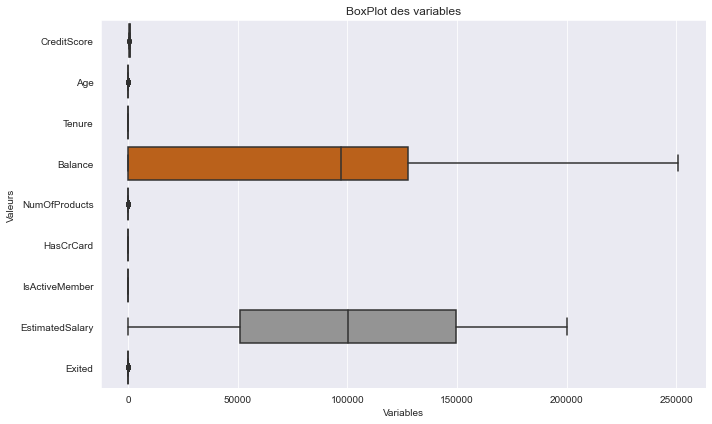

In [15]:
sns.set_style("darkgrid")   # Définition du style du graphique
plt.figure(figsize=(10, 6))   # Définition de la taille de la figure
# Création du boxplot avec les données de dataset, une palette de couleurs "colorblind", et une orientation horizontale
sns.boxplot(data=dataset, palette="colorblind", orient='h')
plt.title("BoxPlot des variables")   # Ajout du titre du graphique
plt.xlabel("Variables")   # Ajout de l'étiquette de l'axe des x
plt.ylabel("Valeurs")   # Ajout de l'étiquette de l'axe des y
plt.tight_layout()   # Ajustement automatique des sous-plots pour éviter les chevauchements
plt.show()   # Affichage du graphique

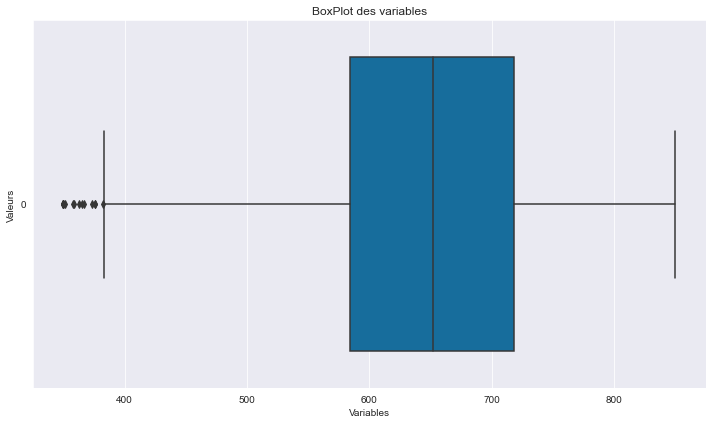

In [16]:
sns.set_style("darkgrid")   # Définition du style du graphique

plt.figure(figsize=(10, 6))   # Définition de la taille de la figure

# Création du boxplot avec les données de la colonne 'CreditScore' de dataset, une palette de couleurs "colorblind", et une orientation horizontale
sns.boxplot(data=dataset.CreditScore, palette="colorblind", orient='h')

plt.title("BoxPlot des variables")   # Ajout du titre du graphique
plt.xlabel("Variables")   # Ajout de l'étiquette de l'axe des x
plt.ylabel("Valeurs")   # Ajout de l'étiquette de l'axe des y
plt.tight_layout()   # Ajustement automatique des sous-plots pour éviter les chevauchements
plt.show()   # Affichage du graphique

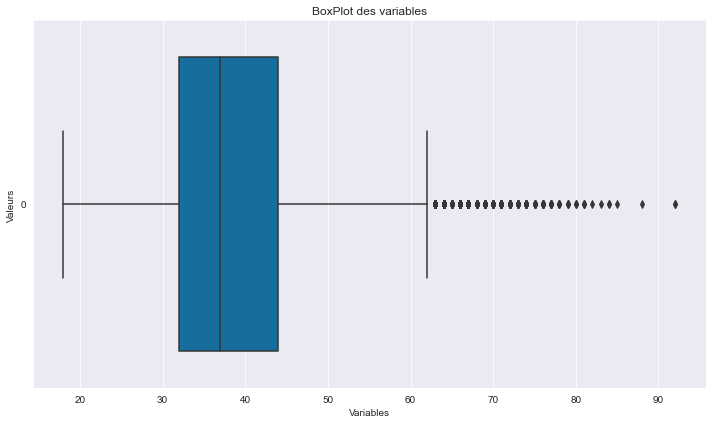

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.Age, palette="colorblind", orient='h')
plt.title("BoxPlot des variables")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.tight_layout()
plt.show()

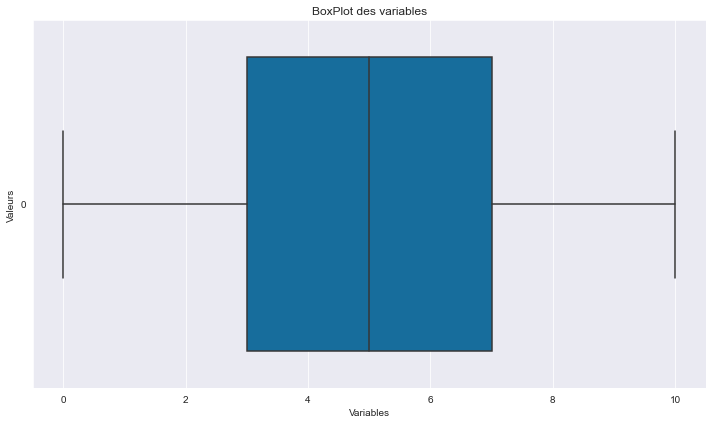

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.Tenure, palette="colorblind", orient='h')
plt.title("BoxPlot des variables")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.tight_layout()
plt.show()

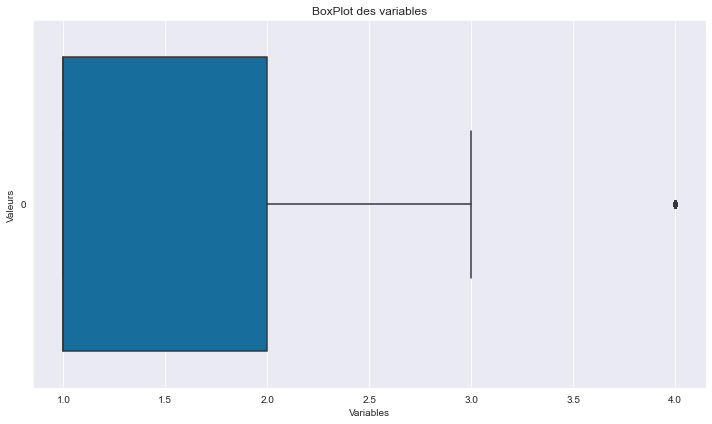

In [19]:

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.NumOfProducts, palette="colorblind", orient='h')
plt.title("BoxPlot des variables")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.tight_layout()
plt.show()

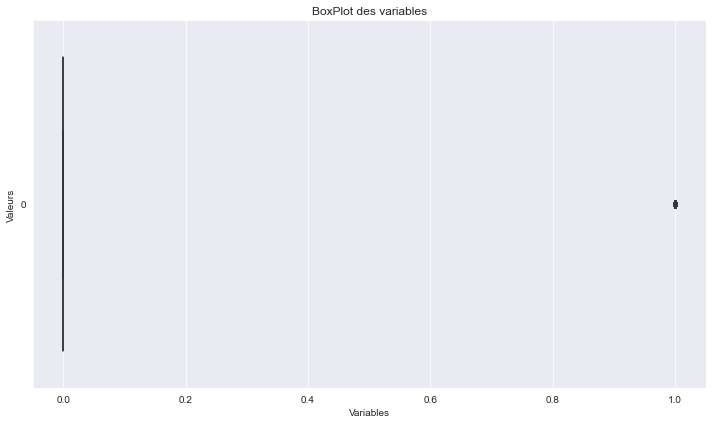

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset.Exited, palette="colorblind", orient='h')
plt.title("BoxPlot des variables")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.tight_layout()
plt.show()

In [21]:
# Calcul du premier quartile (Q1)
q1 = dataset.NumOfProducts.quantile(0.25)

# Calcul du troisième quartile (Q3)
q3 = dataset.NumOfProducts.quantile(0.75)

# Calcul de l'écart interquartile (IQR)
IQR = q3 - q1

# Calcul des bornes inférieure et supérieure pour détecter les valeurs aberrantes
borne_inf = q1 - 1.5 * IQR
borne_sup = q3 + 1.5 * IQR

# Filtrage des données pour ne garder que celles qui sont dans la plage acceptable
dataset = dataset[dataset['NumOfProducts'] <= borne_sup]
dataset = dataset[dataset['NumOfProducts'] >= borne_inf]

In [22]:
# Calcul du premier quartile (Q1)
q1 = dataset.CreditScore.quantile(0.25)

# Calcul du troisième quartile (Q3)
q3 = dataset.CreditScore.quantile(0.75)

# Calcul de l'écart interquartile (IQR)
IQR = q3 - q1

# Calcul des bornes inférieure et supérieure pour détecter les valeurs aberrantes
borne_inf = q1 - 1.5 * IQR
borne_sup = q3 + 1.5 * IQR

# Filtrage des données pour ne garder que celles qui sont dans la plage acceptable
dataset = dataset[dataset['CreditScore'] <= borne_sup]
dataset = dataset[dataset['CreditScore'] >= borne_inf]

## Encodage avec Dummies

In [23]:
# Sélection des dix premières colonnes comme variables indépendantes (X)
x = dataset.iloc[:, 0:10]

# Sélection de la onzième colonne comme variable dépendante (Y)
y = dataset.iloc[:, 10]

In [24]:
# Appliquer l'encodage one-hot aux variables catégorielles dans le DataFrame x
x = pd.get_dummies(data=x, drop_first=True)

In [25]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


<AxesSubplot:>

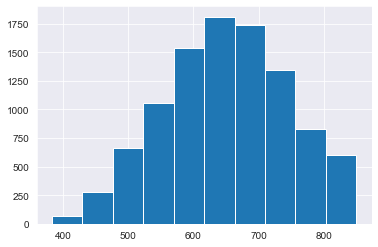

In [26]:
# Créer un histogramme de la colonne 'CreditScore' dans le DataFrame x
x.CreditScore.hist()

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Geography_Germany'}>],
       [<AxesSubplot:title={'center':'Geography_Spain'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>, <AxesSubplot:>]],
      dtype=object)

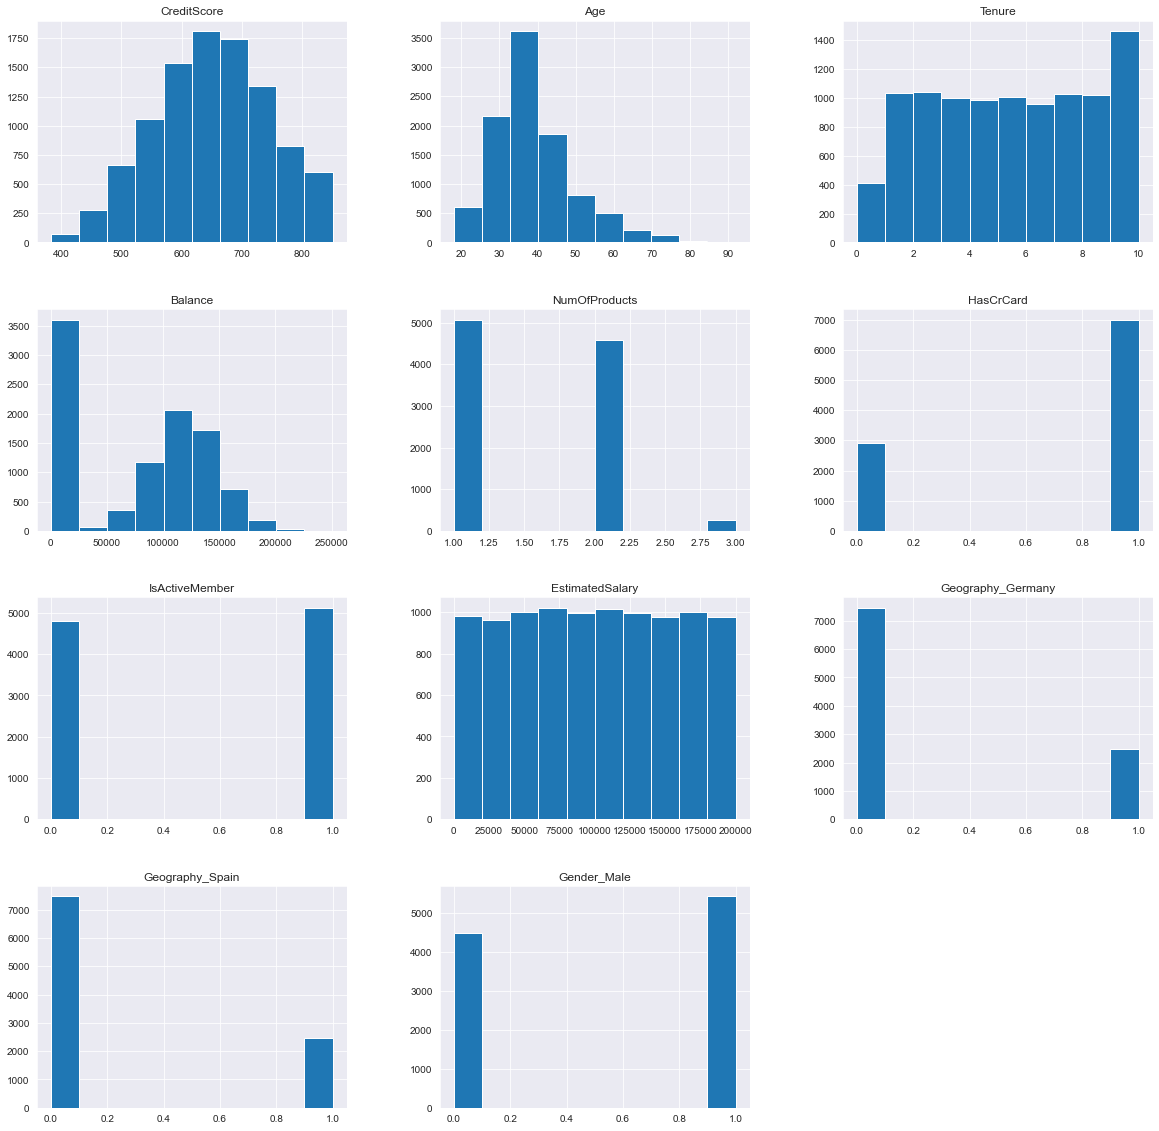

In [27]:
# Créer des histogrammes pour chaque colonne du DataFrame x
x.hist(figsize=(20, 20))

## traitement de Modèle

### Splitting Data 

In [28]:
from sklearn.model_selection import train_test_split   # Importation de la fonction train_test_split de scikit-learn

# Séparation des données en ensembles d'entraînement et de test
# test_size=0.2 : 20% des données sont utilisées pour le test, le reste (80%) pour l'entraînement

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Mise à echelle

In [29]:
from sklearn.preprocessing import MinMaxScaler   # Importation de la classe MinMaxScaler de scikit-learn

# Initialisation d'un objet MinMaxScaler
scaler = MinMaxScaler()

# Normalisation des données d'entraînement et de test en utilisant MinMaxScaler
# x_train_sc : données d'entraînement normalisées
# x_test_sc : données de test normalisées
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

### 1/ LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression   # Importation de la classe LogisticRegression de scikit-learn

# Initialisation d'un modèle de régression logistique
lr = LogisticRegression()

# Entraînement du modèle de régression logistique sur les données d'entraînement normalisées
lr.fit(x_train_sc, y_train)

LogisticRegression()

In [31]:
# Afficher les coefficients de régression logistique
print(lr.coef_)

[[-0.295103    4.946123   -0.30002313  0.50780268 -0.59572417 -0.03865404
  -1.03970923  0.11178392  0.82691298  0.08263749 -0.51330126]]


In [32]:
# Afficher le terme d'interception de la régression logistique
print(lr.intercept_)

[-2.19094814]


In [33]:
# Accéder au coefficient associé à la première variable d'entrée
coef_first_variable = lr.coef_[0][0]

# Afficher le coefficient
print("Coefficient de la première variable d'entrée :", coef_first_variable)

Coefficient de la première variable d'entrée : -0.29510300238144604


In [34]:
# Prédire les probabilités pour chaque classe pour les échantillons de test
proba_predictions = lr.predict_proba(x_test_sc)

# Afficher les probabilités prédites pour les premiers échantillons de test
print(proba_predictions[:5])  # Affiche les probabilités des cinq premiers échantillons

[[0.96951151 0.03048849]
 [0.80698766 0.19301234]
 [0.70252149 0.29747851]
 [0.51234017 0.48765983]
 [0.9182608  0.0817392 ]]


In [35]:
# Prédire les probabilités pour la classe positive (classe 1) pour les échantillons de test
y_test_pred_prob = lr.predict_proba(x_test_sc)[:, 1]

# Afficher les probabilités prédites pour les premiers échantillons de test
print(y_test_pred_prob[:5])  # Affiche les probabilités des cinq premiers échantillons

[0.03048849 0.19301234 0.29747851 0.48765983 0.0817392 ]


In [36]:
y_pred_lr = lr.predict(x_test_sc)
# Afficher les prédictions pour les premiers échantillons de test
y_pred_lr[:5] # Affiche les prédictions des cinq premiers échantillons

array([0, 0, 0, 0, 0], dtype=int64)

In [37]:
# Calcul de la somme pondérée des caractéristiques du premier échantillon de test avec les coefficients du modèle
zx = lr.intercept_ + x_test_sc[0, :].dot(lr.coef_[0, :])

# Application de la fonction sigmoïde pour obtenir la probabilité d'appartenance à la classe 1
sig = 1 / (1 + np.exp(-zx))

# Affichage de la probabilité calculée
print("Probabilité d'appartenance à la classe 1 pour le premier échantillon de test :", sig)

Probabilité d'appartenance à la classe 1 pour le premier échantillon de test : [0.03048849]


In [38]:
# Calcul de la somme pondérée des caractéristiques du deuxième échantillon de test avec les coefficients du modèle
zx1 = lr.intercept_ + x_test_sc[1, :].dot(lr.coef_[0, :])

# Application de la fonction sigmoïde pour obtenir la probabilité d'appartenance à la classe 1
sig1 = 1 / (1 + np.exp(-zx1))

# Affichage de la probabilité calculée pour le deuxième échantillon de test
print("Probabilité d'appartenance à la classe 1 pour le deuxième échantillon de test :", sig1)


Probabilité d'appartenance à la classe 1 pour le deuxième échantillon de test : [0.19301234]


## Evaluation du modéle

In [39]:
from sklearn.metrics import (
    confusion_matrix,       # Importation de la fonction confusion_matrix pour évaluer les performances du modèle
    accuracy_score,         # Importation de la fonction accuracy_score pour calculer le score d'exactitude
    precision_score,        # Importation de la fonction precision_score pour calculer la précision
    recall_score,           # Importation de la fonction recall_score pour calculer le rappel
    classification_report   # Importation de la fonction classification_report pour afficher un rapport de classification
)

In [40]:
# Afficher la matrice de confusion
print(confusion_matrix(y_test, y_pred_lr))

[[1565   36]
 [ 301   84]]


In [41]:
# Afficher le score d'exactitude
print('Accuracy score: {0:.3f}'.format(accuracy_score(y_test, y_pred_lr)))

# Afficher le score de précision
print('Precision score: {0:.3f}'.format(precision_score(y_test, y_pred_lr)))

# Afficher le score de rappel
print('Recall score: {0:.3f}'.format(recall_score(y_test, y_pred_lr)))

Accuracy score: 0.830
Precision score: 0.700
Recall score: 0.218


In [42]:
# Afficher la matrice de confusion
print('Confusion matrix:\n')
print(confusion_matrix(y_test, y_pred_lr))

# Afficher le score d'exactitude
print('Accuracy score: {0:.3f}'.format(accuracy_score(y_test, y_pred_lr)))

# Afficher le score de précision
print('Precision score: {0:.3f}'.format(precision_score(y_test, y_pred_lr)))

# Afficher le score de rappel
print('Recall score: {0:.3f}'.format(recall_score(y_test, y_pred_lr)))

Confusion matrix:

[[1565   36]
 [ 301   84]]
Accuracy score: 0.830
Precision score: 0.700
Recall score: 0.218


In [43]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1601
           1       0.70      0.22      0.33       385

    accuracy                           0.83      1986
   macro avg       0.77      0.60      0.62      1986
weighted avg       0.81      0.83      0.79      1986



## Courbe ROC  LR

In [44]:
# Importation des fonctions d'évaluation des performances des modèles
from sklearn import metrics

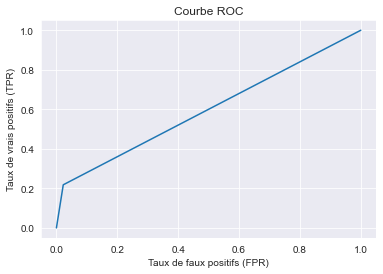

In [45]:
# Calcul des taux de faux positifs (fpr), des taux de vrais positifs (tpr) et des seuils de décision (thr)
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_lr)

# Affichage des taux de faux positifs (fpr) en fonction des taux de vrais positifs (tpr)
plt.plot(fpr, tpr)
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.show()

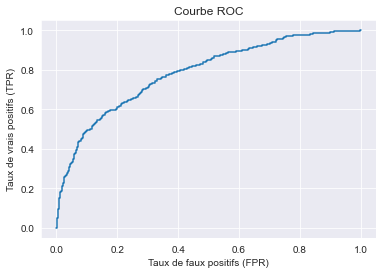

In [46]:
# Calculer les probabilités prédites pour la classe positive
y_test_pred_prob = lr.predict_proba(x_test_sc)[:, 1]

# Calculer les taux de faux positifs (fpr), les taux de vrais positifs (tpr) et les seuils de décision (thr)
fpr1, tpr1, thr1 = metrics.roc_curve(y_test, y_test_pred_prob)

# Afficher la courbe ROC
plt.plot(fpr1, tpr1)
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.show()

In [47]:
# Afficher la forme de thr1
print("Forme de thr1 :", thr1.shape)

Forme de thr1 : (491,)


In [48]:
from numpy import argmax

In [49]:
# Calculer la mesure de Youden
best = tpr1 - fpr1

# Trouver l'indice correspondant au meilleur seuil (maximum de la mesure de Youden)
ix = argmax(best)

In [50]:
# Afficher l'indice du seuil de décision optimal
print("Indice du seuil de décision optimal :", ix)

Indice du seuil de décision optimal : 325


In [51]:
# Extraire le seuil de décision optimal à partir du tableau des seuils (thr1)
best_thr = thr1[ix]

# Afficher le seuil de décision optimal
print("Seuil de décision optimal :", best_thr)

Seuil de décision optimal : 0.17977418168128015


In [52]:
tpr1[ix]

0.7558441558441559

In [53]:
fpr1[ix]

0.3310430980637102

In [54]:
best_thr = thr1[197]

In [55]:
best_thr

0.28766691709117914

In [56]:
tpr1[197]

0.5532467532467532

In [57]:
fpr1[197]

0.14553404122423486

In [58]:
tpr1[ix]-fpr1[ix]

0.4248010577804457

In [59]:
tpr1[197]-fpr1[197]

0.40771271202251835

In [60]:
tpr1[ix]

0.7558441558441559

In [61]:
fpr1[ix]

0.3310430980637102

## 2/ KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# Création d'un classificateur KNN (K-Nearest Neighbors) avec 5 voisins
knn = KNeighborsClassifier(n_neighbors = 5)

In [64]:
# Entraînement du classificateur KNN sur les données d'entraînement normalisées
knn.fit(x_train_sc, y_train)

KNeighborsClassifier()

In [65]:
# Prédiction des étiquettes de classe pour les données de test normalisées
y_pred_knn = knn.predict(x_test_sc)

In [66]:
# Affichage de la matrice de confusion pour évaluer les performances du modèle KNN
print(confusion_matrix(y_test, y_pred_knn))

[[1504   97]
 [ 252  133]]


In [67]:
print('Accuracy score{0:.3f}'.format(accuracy_score(y_test,y_pred_knn)))
print('Precision score{0:.3f}'.format(precision_score(y_test,y_pred_knn)))
print('Recall score{0:.3f}'.format(recall_score(y_test,y_pred_knn)))

Accuracy score0.824
Precision score0.578
Recall score0.345


In [68]:
# Affichage d'un rapport de classification détaillé pour évaluer les performances du modèle KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1601
           1       0.58      0.35      0.43       385

    accuracy                           0.82      1986
   macro avg       0.72      0.64      0.66      1986
weighted avg       0.80      0.82      0.81      1986



In [69]:
# Importation de la classe GridSearchCV pour l'optimisation des hyperparamètres
from sklearn.model_selection import GridSearchCV

In [70]:
# Grille de paramètres à rechercher pour le nombre de voisins
parameters = {'n_neighbors':[1,3,5,7,9,11,13,15]}

# Création d'un modèle KNN de base
model = KNeighborsClassifier()

# Création d'un objet GridSearchCV pour rechercher les meilleurs hyperparamètres
clf = GridSearchCV(model, parameters, scoring='accuracy', cv=5)

# Recherche des meilleurs hyperparamètres en ajustant la grille aux données d'entraînement normalisées
grille = clf.fit(x_train_sc, y_train)

In [71]:
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 7}
0.8187657430730478


## Courbe ROC KNN

[0.         0.06058713 1.        ] [0.         0.34545455 1.        ] [2 1 0]


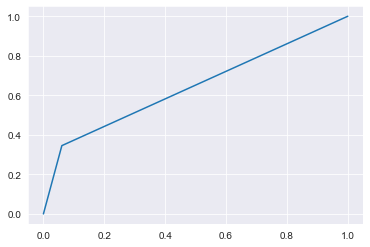

In [72]:
# Calcul des taux de faux positifs (fprk), des taux de vrais positifs (tprk) et des seuils (thrk) pour le modèle KNN
fprk , tprk , thrk = metrics.roc_curve(y_test , y_pred_knn)

# Affichage des taux de faux positifs, des taux de vrais positifs et des seuils
print(fprk , tprk , thrk)

# Tracé de la courbe ROC pour le modèle KNN
plt.plot(fprk , tprk )

## 3/ Comparaison de courbe ROC de Logistic Regression et celle de KNN

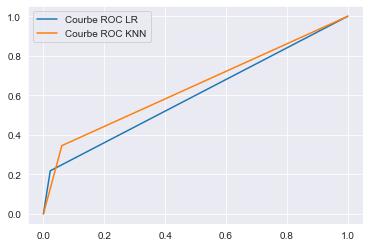

In [73]:
# Calcul des taux de faux positifs (fpr), des taux de vrais positifs (tpr) et des seuils (thr) pour le modèle lr
fpr , tpr , thr = metrics.roc_curve(y_test , y_pred_lr)
# Affichage de la courbe ROC pour le modèle lr
plt.plot(fpr , tpr, label='Courbe ROC LR')

# Calcul des taux de faux positifs (fprk), des taux de vrais positifs (tprk) et des seuils (thrk) pour le modèle KNN
fprk, tprk, thrk,=metrics.roc_curve(y_test, y_pred_knn)
# Affichage de la courbe ROC pour le modèle KNN
plt.plot(fprk,tprk , label='Courbe ROC KNN')

# Ajout de la légende au graphique pour indiquer quel modèle correspond à chaque courbe
plt.legend()